#  🔵 **Parte 2 - Pré-processamento** 🔵

# 🔴 Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly #Para visualização de gráficos mais sofisticados

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🔴 Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados 🔍

Para conseguir abrir os dados aqui, seguimos os seguintes passos:
1. Download dos dados no seu PC
2. Subir aqui ao lado esquerdo no ícone da pastinha
3. Escreve pd.read_csv('')
4. Colocar o que aparece quando você clica no arquivo uploaded em "Copiar Caminho".

In [ ]:
#Abrindo o arquivo
base_credit = pd.read_csv('/content/1. credit_data.csv')

In [ ]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


#### **O que cada coluna significa:**
1. client_id : identificação única do cliente
2. income: variável quantitativa contínua, em dólares e ao ano
3. age: variável quantativa discreta (na base está contínua)
4. loan: valor, em dólares, do empréstimo concedido
5. default: variável binária. se 1, houve calote.

In [ ]:
# Comando para enxergar as n primeiras linhas do dataframe
base_credit.head(4)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0


In [ ]:
base_credit.tail(6)

,clientid,income,age,loan,default
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
# Quem é o cliente mais rico?
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
# Quem é o cliente menos endividado?
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [ ]:
# Quem é o cliente mais endividado?
base_credit[base_credit['loan'] >= 13766.051239]

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0


### Visualização dos dados 👓

In [ ]:
#Quais são os tipos de dados na coluna do atributo meta?
np.unique(base_credit['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

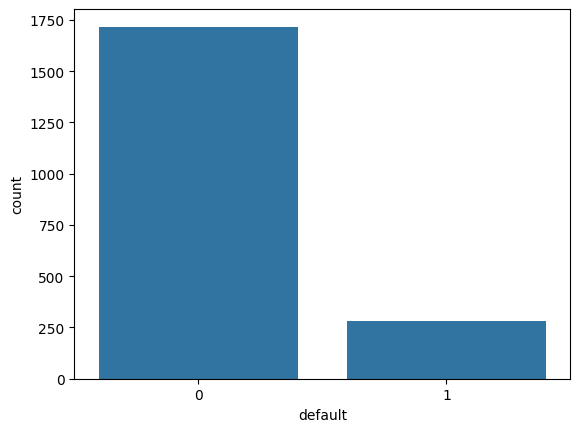

In [ ]:
sns.countplot(x = base_credit['default']);

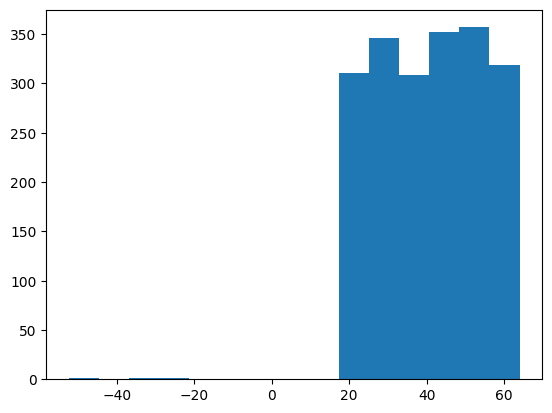

In [ ]:
plt.hist(x = base_credit['age'], bins = 15);

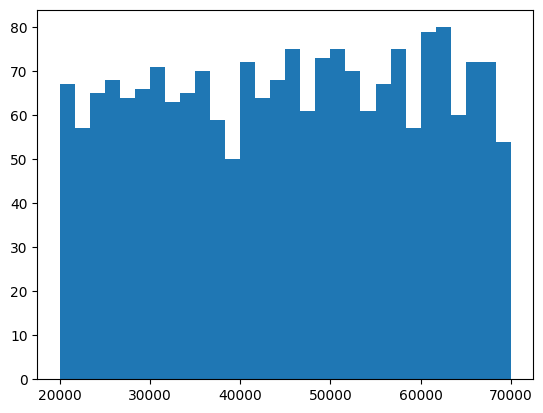

In [ ]:
plt.hist(base_credit['income'], bins = 30);

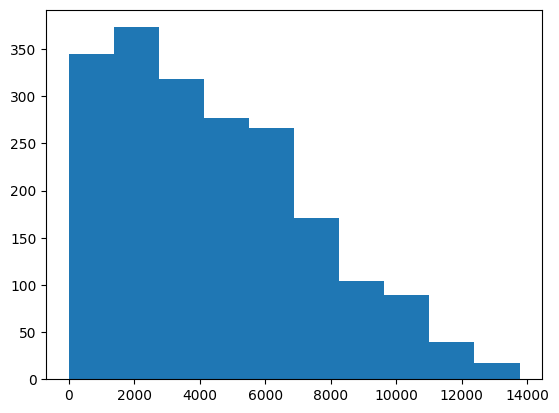

In [ ]:
plt.hist(base_credit['loan']);

In [ ]:
#Gráfico mais sofisticado
grafico = px.scatter_matrix(base_credit,
                            dimensions = ['age', 'income', 'loan'])

grafico.show()

In [ ]:
#Gráfico mais sofisticado
grafico = px.scatter_matrix(base_credit,
                            dimensions = ['age', 'income', 'loan'],
                            color = 'default')

grafico.show()

### Tratamento de valores inconsistentes ⭐

In [ ]:
# Pelos gráficos, foi possível perceber que existem idades negativas.
# Isso é, necessariamente, um erro.

base_credit[['clientid','age']].loc[base_credit['age'] < 0]

,clientid,age
15,16,-28.218361
21,22,-52.423280
26,27,-36.496976


#### 1ª forma de lidar com o problema nas idades:

In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit_wout_age = base_credit.drop('age', axis = 1)

base_credit_wout_age.head()

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1


📝
**Axis = 0 : linha**

**Axis = 1 : coluna**

#### 2ª forma de lidar com o problema nas idades:

In [ ]:
# Função INDEX
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [ ]:
index_inconsistente = base_credit[base_credit['age'] < 0].index
index_inconsistente

Index([15, 21, 26], dtype='int64')

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit_adjusted_age = base_credit.drop(index_inconsistente)
base_credit_adjusted_age.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
#Verificando se deu certo
print(base_credit_adjusted_age.loc[base_credit_adjusted_age['age'] < 0])
print(base_credit_adjusted_age.shape)

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []
(1997, 5)


#### 3ª forma de lidar com o problema nas idades:

1. Preencher manualmente. É preferível preencher a excluir.

#### 4ª forma de lidar com o problema nas idades:

Preencher a média

In [ ]:
base_credit['age'].mean()
#Mas essa média está errada. Pois há dados errados (lembre: idades negativas)

40.80755937840458

In [ ]:
media_correta = base_credit['age'][base_credit['age'] > 0].mean()
print(media_correta)

40.92770044906149


In [ ]:
# Fazendo a substituição
base_credit.loc[base_credit['age'] < 0, 'age'] = media_correta

In [ ]:
# Verificando que funcionou
base_credit.loc[index_inconsistente]

,clientid,income,age,loan,default
15,16,50501.726689,40.9277,3977.287432,0
21,22,32197.620701,40.9277,4244.057136,0
26,27,63287.038908,40.9277,9595.286289,0


### Tratamento de valores faltantes 🐟

ISNULL

FILLNA

In [ ]:
# Função ISNULL
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


Percebe-se que apenas a coluna AGE tem valores ausentes.

📝
**TRUE = 1**

**FALSE = 0**

In [ ]:
# Encontrando as linhas com valores de idade ausentes

base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
index_ausentes = base_credit.loc[pd.isnull(base_credit['age'])].index

index_ausentes

Index([28, 30, 31], dtype='int64')

In [ ]:
# Preenchendo os valores NaN pela média

base_credit['age'].fillna(media_correta, inplace = True)

In [ ]:
# Verificando se funcionou

print(base_credit.isnull().sum())

print(base_credit.loc[index_ausentes])

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64
    clientid        income      age         loan  default
28        29  59417.805406  40.9277  2082.625938        0
30        31  48528.852796  40.9277  6155.784670        0
31        32  23526.302555  40.9277  2862.010139        0


### Divisão entre previsores e classe ➗

n tributos previsores X 1 Atributo meta (classe)

Normamente, a classe é chamada de Y. As variáveis explicativas são chamadas X.

In [ ]:
base_credit.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

Lembrando que no ILOC, o primeiro índice é considerado, mas o último é assumido por n-1. Logo, iloc[:, 1:4] é o mesmo que dizer todas as linhas, colunas de índice 1, e 2 3.

In [ ]:
# Definindo o conjunto de variáveis explicativas
X_credit = base_credit.iloc[:, 1:4].values

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
Y_credit = base_credit.iloc[:, 4].values

In [ ]:
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(Y_credit)

numpy.ndarray

### Escalonamento dos valores 🦖

In [ ]:
#Visualizando nosso vetor de variáveis explicativas.
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
# Conhecendo os valores mínimos de cada variável

X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
# Conhecendo os valores máximos de cada variável

X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

#### Biblioteca para uniformizar os dados

Eles apresentam diferentes escalas. Perceba que rendas estão em dezenas de milhares, idade em unidades e empréstimos em milhares.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler() #Cria um objeto, uma função.

X_credit_escalonado = scaler_credit.fit_transform(X_credit)

In [ ]:
#Vendo os valores mínimos, agora escalonado
print(X_credit_escalonado[:,0].min()),
print(X_credit_escalonado[:,1].min()),
print(X_credit_escalonado[:,2].min())

-1.7676158019964077
-1.7264154144794286
-1.4592791099462408


In [ ]:
#Vendo os valores maxímos, agora escalonado
print(X_credit_escalonado[:,0].max()),
print(X_credit_escalonado[:,1].max()),
print(X_credit_escalonado[:,2].max())

1.7220222385319197
1.739366520151568
3.0616609141708273


In [ ]:
X_credit_escalonado

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

# 🔴 Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados 🔍

In [ ]:
base_census = pd.read_csv('/content/2. census.csv')

In [ ]:
base_census.shape

(32561, 15)

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
base_census.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


**Conhecendo as colunas**
1. age: var. quantativa discreta
2. workclass: var. qualitativa categórica
3. final-weight: var. quantativa discreta
4. education: var. qualitativa ordinal
5. education_num: var. quantativa discreta

6, 7, 8, 9, 10. marital_status / ocupation / relationship / race /sex : var. qualitativa categórica

11, 12. capital_gain, capital_loss: var. quantativa contínua

13. hour_per_week: var. quantativa discreta
14. native_country: var. qualitativa categórica
15. income: binária. ordinal.

In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Não existem valores ausentes

base_census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Visualização dos dados 👓

In [ ]:
# Conhecendo a coluna de interesse
np.unique(base_census['income'], return_counts = 1)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

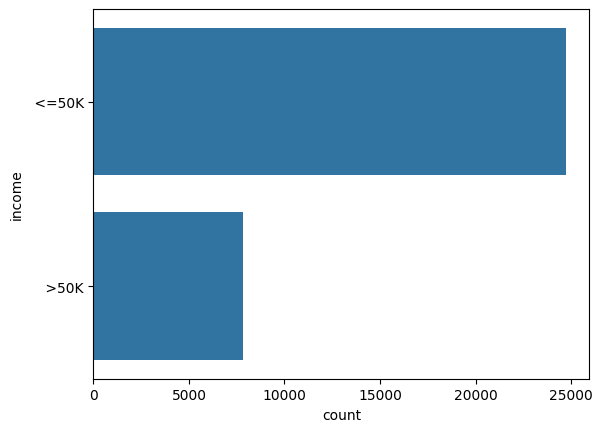

In [ ]:
sns.countplot(base_census['income']);

# A maior parte das pessoas recebe menos ou igual a 50 mil dólares por ano

#### Histogramas

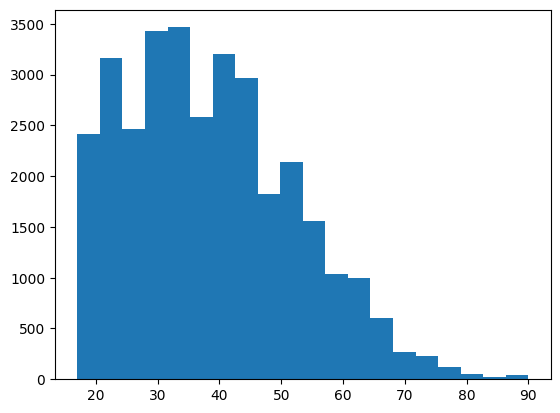

In [ ]:
# Histograma das idades

plt.hist(x = base_census['age'], bins = 20);

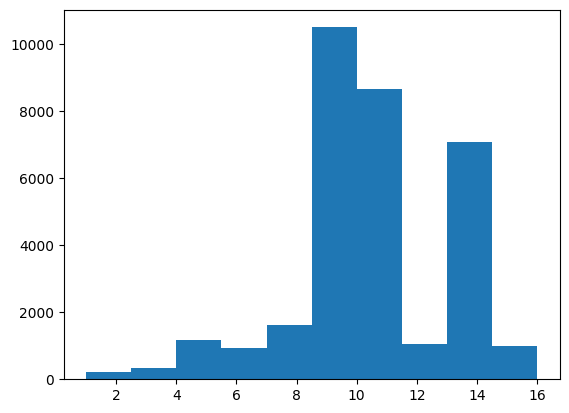

In [ ]:
# Histograma dos anos de educação

plt.hist(x = base_census['education-num']);

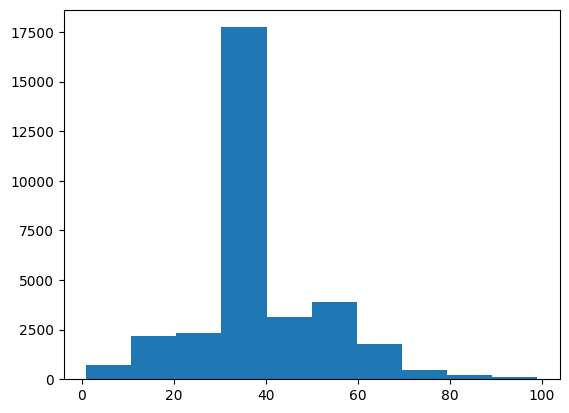

In [ ]:
# Histograma das horas de trabalho na semana

plt.hist(x = base_census['hour-per-week']);

#### Ploty.express: Gráficos mais sofisticados

In [ ]:
grafico = px.treemap(base_census, path = ['workclass'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path = ['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census,
                     path = ['occupation', 'relationship']
                      )
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census,
                                 dimensions = ['workclass', 'relationship']
                                 )
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census,
                                 dimensions = ['workclass', 'education','income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe ➗

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
base_census.shape
#Existem 15 colunas

(32561, 15)

In [ ]:
# Transformando em array
X_census = base_census.iloc[:, 0:14].values

In [ ]:
type(X_census)

numpy.ndarray

In [ ]:
#Consultando a primeira linha
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
Y_census = base_census.iloc[ : , 14].values

In [ ]:
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de atributos categóricos 🌟

Transformar de string para números, com o intuito de conseguir utilizar tais variáveis nos modelos matemáticos.

### LabelEncoder 🟢

Pode gerar o mesmo problema de ser um valor grande, caso você tenha muitas categorias.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#### Experimentando

In [ ]:
# Criando o objeto
teste_label_encoder = LabelEncoder()

In [ ]:
workclass = X_census[:,1]

In [ ]:
testando = teste_label_encoder.fit_transform(workclass)

In [ ]:
print(testando),
print(workclass)

[7 6 4 ... 4 4 5]
[' State-gov' ' Self-emp-not-inc' ' Private' ... ' Private' ' Private'
 ' Self-emp-inc']


Perceba que cada string recebeu um número. Por exemplo: 'Private' virou 4.

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

#### Aplicando

In [ ]:
# Criando o objeto
label_encoder = LabelEncoder()

In [ ]:
# Criando o array das variáveis preditoras com as var. categóricas em números
X_census_encoded = X_census.copy()

In [ ]:
base_census.columns

#Auxílio para determinar quais colunas transformar

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Transformando!

X_census_encoded[:, 1 ] = label_encoder.fit_transform(X_census[:,1])
X_census_encoded[:, 3 ] = label_encoder.fit_transform(X_census[:,3])
X_census_encoded[:, 5 ] = label_encoder.fit_transform(X_census[:,5])
X_census_encoded[:, 6 ] = label_encoder.fit_transform(X_census[:,6])
X_census_encoded[:, 7 ] = label_encoder.fit_transform(X_census[:,7])
X_census_encoded[:, 8 ] = label_encoder.fit_transform(X_census[:,8])
X_census_encoded[:, 9 ] = label_encoder.fit_transform(X_census[:,9])
X_census_encoded[:, 13] = label_encoder.fit_transform(X_census[:,13])

In [ ]:
#Funcionou? (yeeeah!)
print(X_census_encoded[0],'\n')
print(X_census[0])

[39 7 77516 9 13 4 1 1 4 1 2174 0 40 39] 

[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States']


### OneHotEncoder 🟢

Cria como se fosse um padrão de 0 e 1 para representar uma determinada categoria. Exemplo abaixo:


In [ ]:
# Carro

# Gol Pálio Uno
#   1   2   3

# Gol   1 0 0
# Pálio 0 1 0
# Uno   0 0 1

In [ ]:
len(np.unique(base_census['occupation']))

#Nesse caso, você geraria 15 colunas. Pois são 15 categorias possíveis.

15

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot',
                                                        OneHotEncoder(),
                                                         [1,3,5,6,7,8,9,13])],
                                         remainder='passthrough')

#Esse vetor é número das colunas que você quer transformar
#O remainder, caso não configurado, apagaria as outras colunas (que não categóricas)

In [ ]:
X_census_labeled = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census_labeled.shape

#Perceba que o número de colunas aumentou!

(32561, 108)

In [ ]:
#Como fica o primeiro cliente?

print(X_census[0],'\n\n')
print(X_census_labeled[0])

[39 ' State-gov' 77516 ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 2174 0 40 ' United-States'] 


[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.

## Escalonamento dos valores 🐋

In [ ]:
from sklearn.preprocessing import StandardScaler #Importando
standard_scaler = StandardScaler() # Criando o objeto

In [ ]:
X_census_escalonado = standard_scaler.fit_transform(X_census_labeled)
X_census_escalonado

#OBS: Não concordo em escalonar as colunas do OneHotEncoder.

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

# 🔴 Divisão das bases em treinamento e teste

* Os dados de treino devem ser mais numerosos que os dados de teste
* Random_state pode ser definido como qualquer nº, mas é importante fixar para que os mesmos dados sejam alocados na base de treino e na base de teste.
* Ordem: variáveis explicativas (treino, teste) e depois variável predita (treino e teste)

In [ ]:
from sklearn.model_selection import train_test_split

## Credit data 🔻

In [ ]:
X_credit_treino, X_credit_teste, Y_credit_treino, Y_credit_teste = train_test_split(X_credit_escalonado,
                                                                                    Y_credit,
                                                                                    test_size = 1/4,
                                                                                    random_state = 0)

In [ ]:
print(X_credit_treino.shape,'\n', Y_credit_treino.shape)

(1500, 3) 
 (1500,)


In [ ]:
print(X_credit_teste.shape,'\n', Y_credit_teste.shape)

(500, 3) 
 (500,)


## Census 🔻

In [ ]:
X_census_treino, X_census_teste, Y_census_treino, Y_census_teste = train_test_split(X_census_escalonado,
                                                                                    Y_census,
                                                                                    test_size = 0.15,
                                                                                    random_state = 0)

In [ ]:
print(X_census_treino.shape,'\n', Y_census_treino.shape)

(27676, 108) 
 (27676,)


In [ ]:
print(X_census_teste.shape,'\n', Y_census_teste.shape)

(4885, 108) 
 (4885,)


# 🔴 Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treino, X_credit_teste, Y_credit_treino, Y_credit_teste],
              f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treino, X_census_teste, Y_census_treino, Y_census_teste],
               f)